### March 18. plotting the bare soil indices.


In [1]:
import csv
import numpy as np
import pandas as pd
import geopandas as gpd
import sys
from IPython.display import Image
from shapely.geometry import Point, Polygon
from math import factorial
import datetime
import time
import scipy
import os, os.path

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb


import sys
# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/remote_sensing/python/')
import remote_sensing_core as rc
import remote_sensing_core as rcp

start = time.time()

In [2]:
 data_dir = "/Users/hn/Documents/01_research_data/remote_sensing/" + \
           "01_NDVI_TS/02_TS_Batches_70_cloud/"

output_dir = data_dir
plot_dir_base = data_dir + "plots/"


In [3]:
file_names = ["Grant_2017_4_Kirti_plot_TS_70_cloud.csv"]
file_N = file_names[0]
an_EE_TS = pd.read_csv(data_dir + file_N)

####################################################################################
###
###                   process data
###
####################################################################################
#
#  Pick Grant
#
print (an_EE_TS.county.unique())
an_EE_TS = an_EE_TS[an_EE_TS['county']=="Grant"]
print (an_EE_TS.county.unique())

#
# The following columns do not exist in the old data
#
an_EE_TS['CovrCrp'] = "NA"

an_EE_TS_NDVI = rc.initial_clean(df = an_EE_TS, column_to_be_cleaned='NDVI')
an_EE_TS_EVI = rc.initial_clean(df = an_EE_TS, column_to_be_cleaned='EVI')

an_EE_TS_BSI = rc.initial_clean(df = an_EE_TS, column_to_be_cleaned='BSI')
an_EE_TS_NDWI = rc.initial_clean(df = an_EE_TS, column_to_be_cleaned='NDWI')
an_EE_TS_PSRI = rc.initial_clean(df = an_EE_TS, column_to_be_cleaned='PSRI')
an_EE_TS_LSWI = rc.initial_clean(df = an_EE_TS, column_to_be_cleaned='LSWI')

an_EE_TS_NDVI.head(2)

['Grant']
['Grant']


,B1,B10,B11,B12,B2,B3,B4,B5,B6,B7,...,Shp_Lng,Source,TRS,TtlAcrs,county,doy,system:time_start,year,geo,CovrCrp
0,0.656167,0.002976,0.104220,0.098706,0.637044,0.559763,0.624844,0.645475,0.653180,0.658423,...,266.062411,WSDA,T13R24E6,1,Grant,2.0,1.483471e+12,2017.0,"{""type"":""Polygon"",""coordinates"":[[[-119.872912...",NA
2,0.189627,0.004472,0.240496,0.211456,0.174150,0.161970,0.180571,0.190990,0.205605,0.216567,...,266.062411,WSDA,T13R24E6,1,Grant,59.0,1.488395e+12,2017.0,"{""type"":""Polygon"",""coordinates"":[[[-119.872912...",NA


In [4]:
### List of unique polygons
polygon_list = an_EE_TS_NDVI['geo'].unique()
print(len(polygon_list))

2886


In [5]:
a_poly = polygon_list[0]

In [9]:
counter = 0
counter += 1
curr_field_NDVI = an_EE_TS_NDVI[an_EE_TS_NDVI['geo']==a_poly]
curr_field_EVI = an_EE_TS_EVI[an_EE_TS_EVI['geo']==a_poly]

curr_field_BSI = an_EE_TS_BSI[an_EE_TS_BSI['geo']==a_poly]
curr_field_NDWI = an_EE_TS_NDWI[an_EE_TS_NDWI['geo']==a_poly]
curr_field_PSRI = an_EE_TS_PSRI[an_EE_TS_PSRI['geo']==a_poly]
curr_field_LSWI = an_EE_TS_LSWI[an_EE_TS_LSWI['geo']==a_poly]

year = int(curr_field_NDVI['year'].unique())
plant = curr_field_NDVI['CropTyp'].unique()[0]

# Take care of names, replace "/" and "," and " " by "_"
plant = plant.replace("/", "_")
plant = plant.replace(",", "_")
plant = plant.replace(" ", "_")

county = curr_field_NDVI['county'].unique()[0]
TRS = curr_field_NDVI['TRS'].unique()[0]
ID = curr_field_NDVI['ID'].unique()[0]
source = curr_field_NDVI['Source'].unique()[0]

x_NDVI = curr_field_NDVI['doy']
y_NDVI = curr_field_NDVI['NDVI']

x_EVI = curr_field_EVI['doy']
y_EVI = curr_field_EVI['EVI']

x_BSI = curr_field_BSI['doy']
y_BSI = curr_field_BSI['BSI']

x_NDWI = curr_field_NDWI['doy']
y_NDWI = curr_field_NDWI['NDWI']

x_PSRI = curr_field_PSRI['doy']
y_PSRI = curr_field_PSRI['PSRI']

x_LSWI = curr_field_LSWI['doy']
y_LSWI = curr_field_LSWI['LSWI']

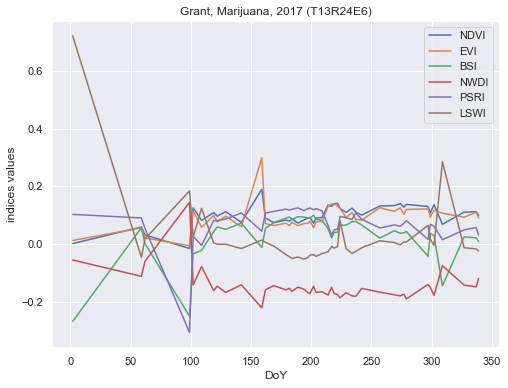

In [10]:
plot_title = county + ", " + plant + ", " + str(year) + " (" + TRS + ")"
sb.set();
fig, ax = plt.subplots(figsize=(8,6));
ax.plot(x_NDVI, y_NDVI, label="NDVI");
ax.plot(x_EVI, y_EVI, label="EVI")

ax.plot(x_BSI, y_BSI, label="BSI")
ax.plot(x_NDWI, y_NDWI, label="NWDI")

ax.plot(x_PSRI, y_PSRI, label="PSRI")
ax.plot(x_LSWI, y_LSWI, label="LSWI")

ax.set_title(plot_title);
ax.set(xlabel='DoY', ylabel='indices values')
ax.legend(loc="best");

In [ ]:
counter = 0
for a_poly in polygon_list:
    if (counter%1000 == 0):
        print (counter)
    counter += 1
    curr_field_NDVI = an_EE_TS_NDVI[an_EE_TS_NDVI['geo']==a_poly]
    curr_field_EVI = an_EE_TS_EVI[an_EE_TS_EVI['geo']==a_poly]
    
    curr_field_BSI = an_EE_TS_BSI[an_EE_TS_BSI['geo']==a_poly]
    curr_field_NDWI = an_EE_TS_NDWI[an_EE_TS_NDWI['geo']==a_poly]
    curr_field_PSRI = an_EE_TS_PSRI[an_EE_TS_PSRI['geo']==a_poly]
    curr_field_LSWI = an_EE_TS_LSWI[an_EE_TS_LSWI['geo']==a_poly]

    year = int(curr_field_NDVI['year'].unique())
    plant = curr_field_NDVI['CropTyp'].unique()[0]
    
    # Take care of names, replace "/" and "," and " " by "_"
    plant = plant.replace("/", "_")
    plant = plant.replace(",", "_")
    plant = plant.replace(" ", "_")

    county = curr_field_NDVI['county'].unique()[0]
    TRS = curr_field_NDVI['TRS'].unique()[0]
    ID = curr_field_NDVI['ID'].unique()[0]
    source = curr_field_NDVI['Source'].unique()[0]

    x_NDVI = curr_field_NDVI['doy']
    y_NDVI = curr_field_NDVI['NDVI']

    x_EVI = curr_field_EVI['doy']
    y_EVI = curr_field_EVI['EVI']
    
    x_BSI = curr_field_BSI['doy']
    y_BSI = curr_field_BSI['EVI']
    
    x_NDWI = curr_field_NDWI['doy']
    y_NDWI = curr_field_NDWI['EVI']
    
    x_PSRI = curr_field_PSRI['doy']
    y_PSRI = curr_field_PSRI['EVI']
    
    x_LSWI = curr_field_LSWI['doy']
    y_LSWI = curr_field_LSWI['EVI']

    #############################################
    ###
    ###             plot
    ###
    #############################################        
    sub_out = "/plant_based_plots/" + plant + "/"
    plot_path = plot_dir_base + sub_out
    os.makedirs(plot_path, exist_ok=True)
    if (len(os.listdir(plot_path))<100):
        plot_title = county + ", " + plant + ", " + str(year) + " (" + TRS + ")"
        sb.set();
        fig, ax = plt.subplots(figsize=(8,6));
        ax.plot(x_NDVI, y_NDVI, label="NDVI");
        ax.plot(x_EVI, y_EVI, 'r', label="EVI")

        ax.plot(x_BSI, y_BSI, 'r', label="BSI")
        ax.plot(x_NDWI, y_NDWI, 'r', label="NWDI")
        
        ax.plot(x_PSRI, y_PSRI, 'r', label="PSRI")
        ax.plot(x_LSWI, y_LSWI, 'r', label="LSWI")
        
        ax.set_title(plot_title);
        ax.set(xlabel='DoY', ylabel='indices values')
        ax.legend(loc="best");

        fig_name = plot_path + county + "_" + source + "_" + str(year) + "_ID" + str(ID) + str(counter) + '.png'
        plt.savefig(fname = fig_name, \
                    dpi=400,
                    bbox_inches='tight')
        plt.close()
        del(plot_path, sub_out, county, plant, year)

####################################################################################
###
###                   Compute double crop area
###
####################################################################################


end_time = time.time()
print(end_time - start_time)
